<a href="https://colab.research.google.com/github/abc123desygn/ProjectDemiurge-MODELING-AGENCY-B/blob/minor-update-3/ABC_123_DESYGN_%E2%84%A2_(DEMIURGE)_MODELIING_AGENCY_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ABC 123 DESYGN ™: MODELING AGENCY B ™

🤖 MAGNETRON ™ TECHNOLOGY ARTIFICIAL INTELLIGENCE (RESEARCH) 🤖

PART OF **PROJECT DEMIURGE**™ (REALITY MATRIX ™ TECHNOLOGY RESEARCH)


PROPERTY OF ABC 123 DESYGN ™


- FILM PRODUCTION
- TV PRODUCTION
- VFX/CGI
- VIDEO GAME DEVELOPMENT
- SOFTWARE DEVELOPMENT

GET THE LATEST NOTEBOOK HERE:

[![](https://img.shields.io/static/v1?message=Open%20in%20Colab&logo=googlecolab&labelColor=5c5c5c&color=0f80c1&label=%20&style=for-the-badge)](https://github.com/abc123desygn/ProjectDemiurge-MODELING-AGENCY-B/blob/main/ABC_123_DESYGN_%E2%84%A2_(DEMIURGE)_MODELIING_AGENCY_B.ipynb) 

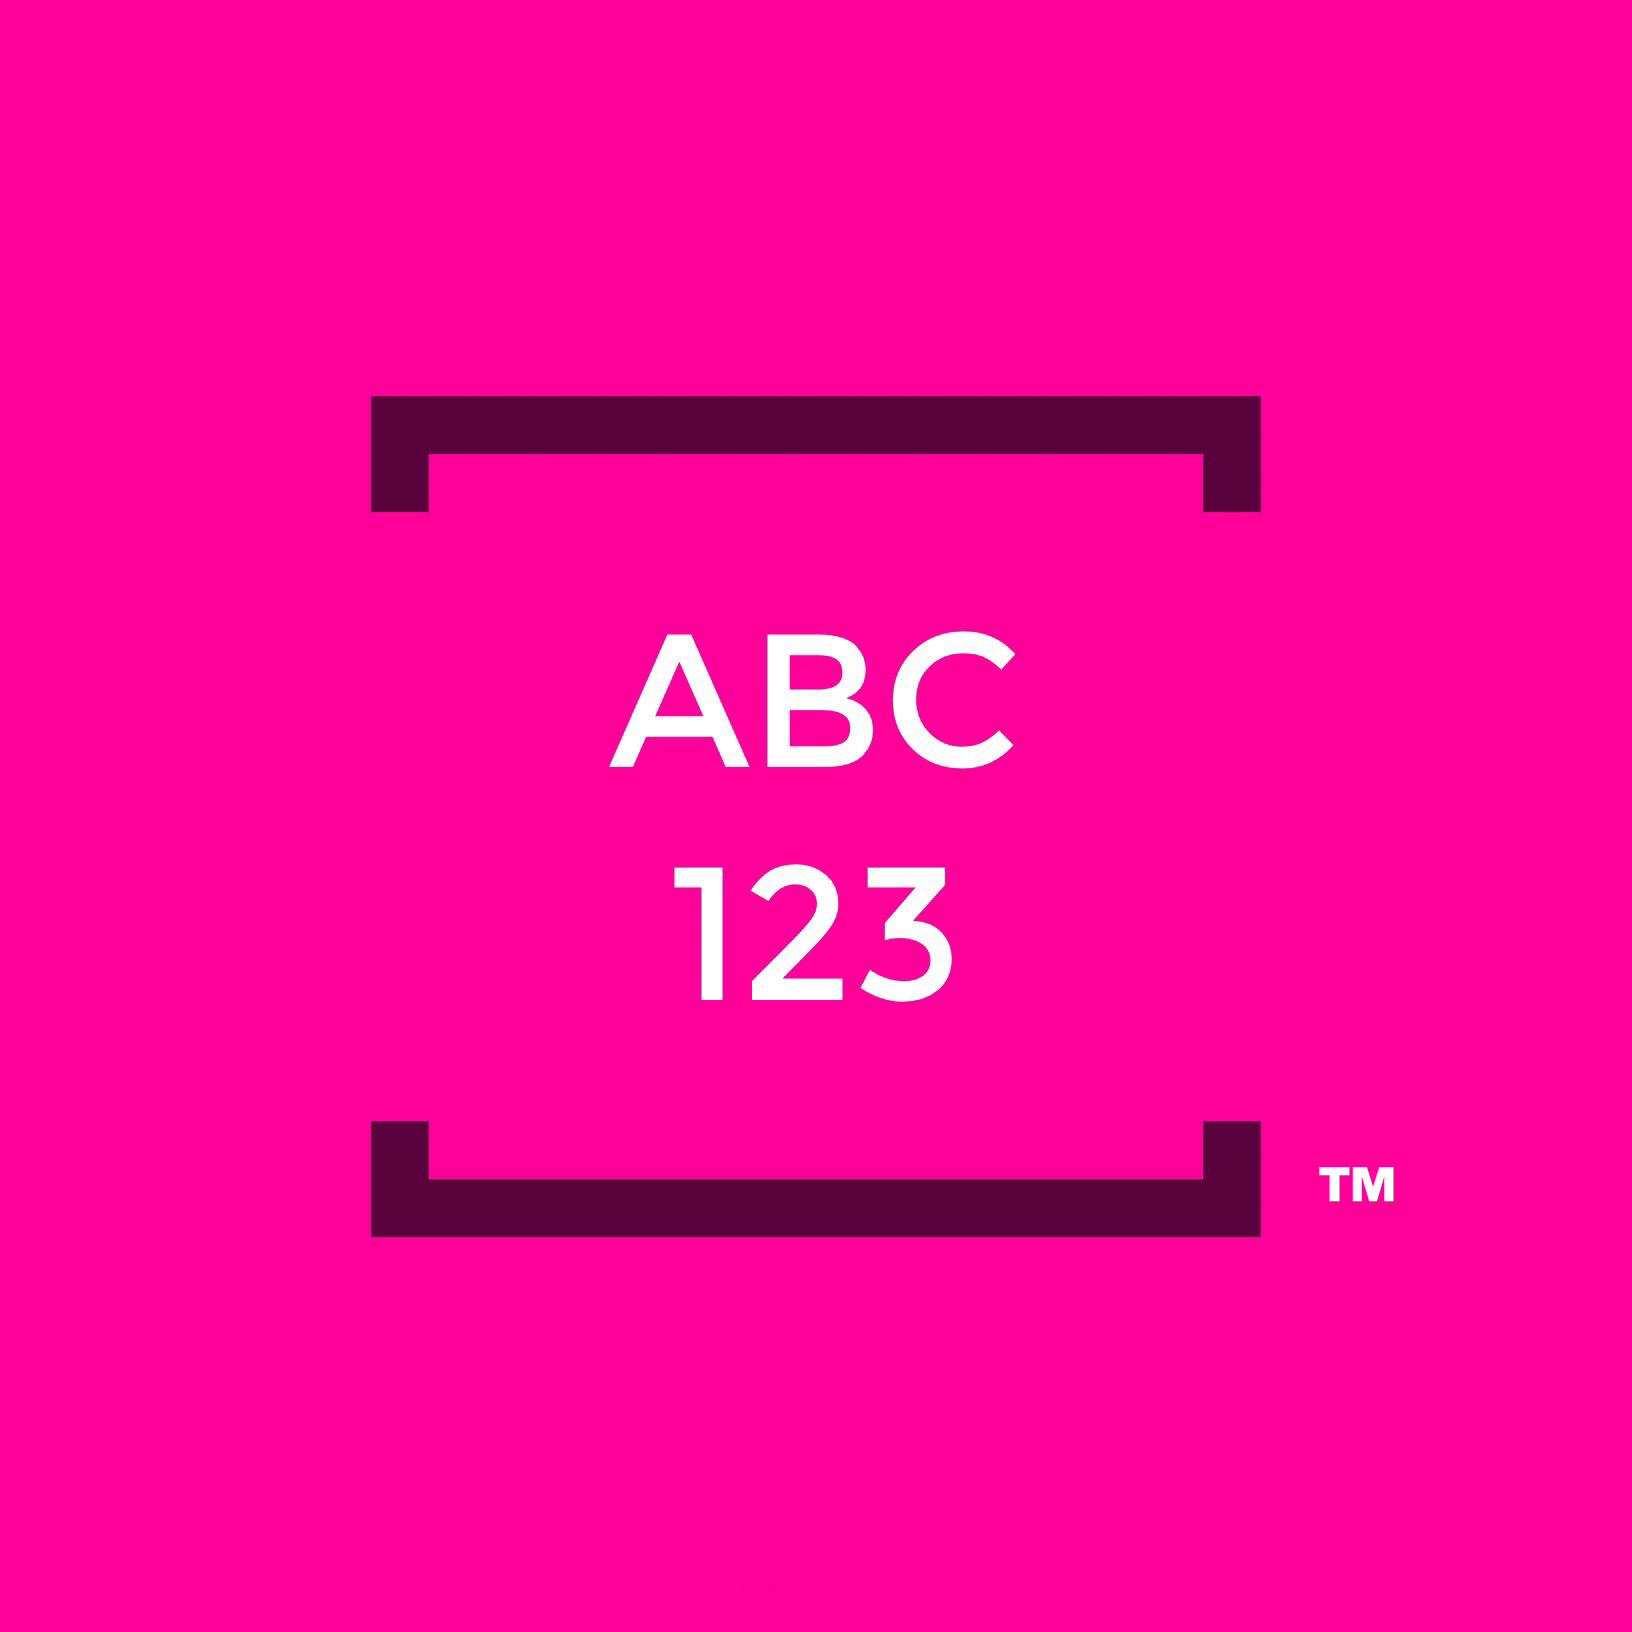

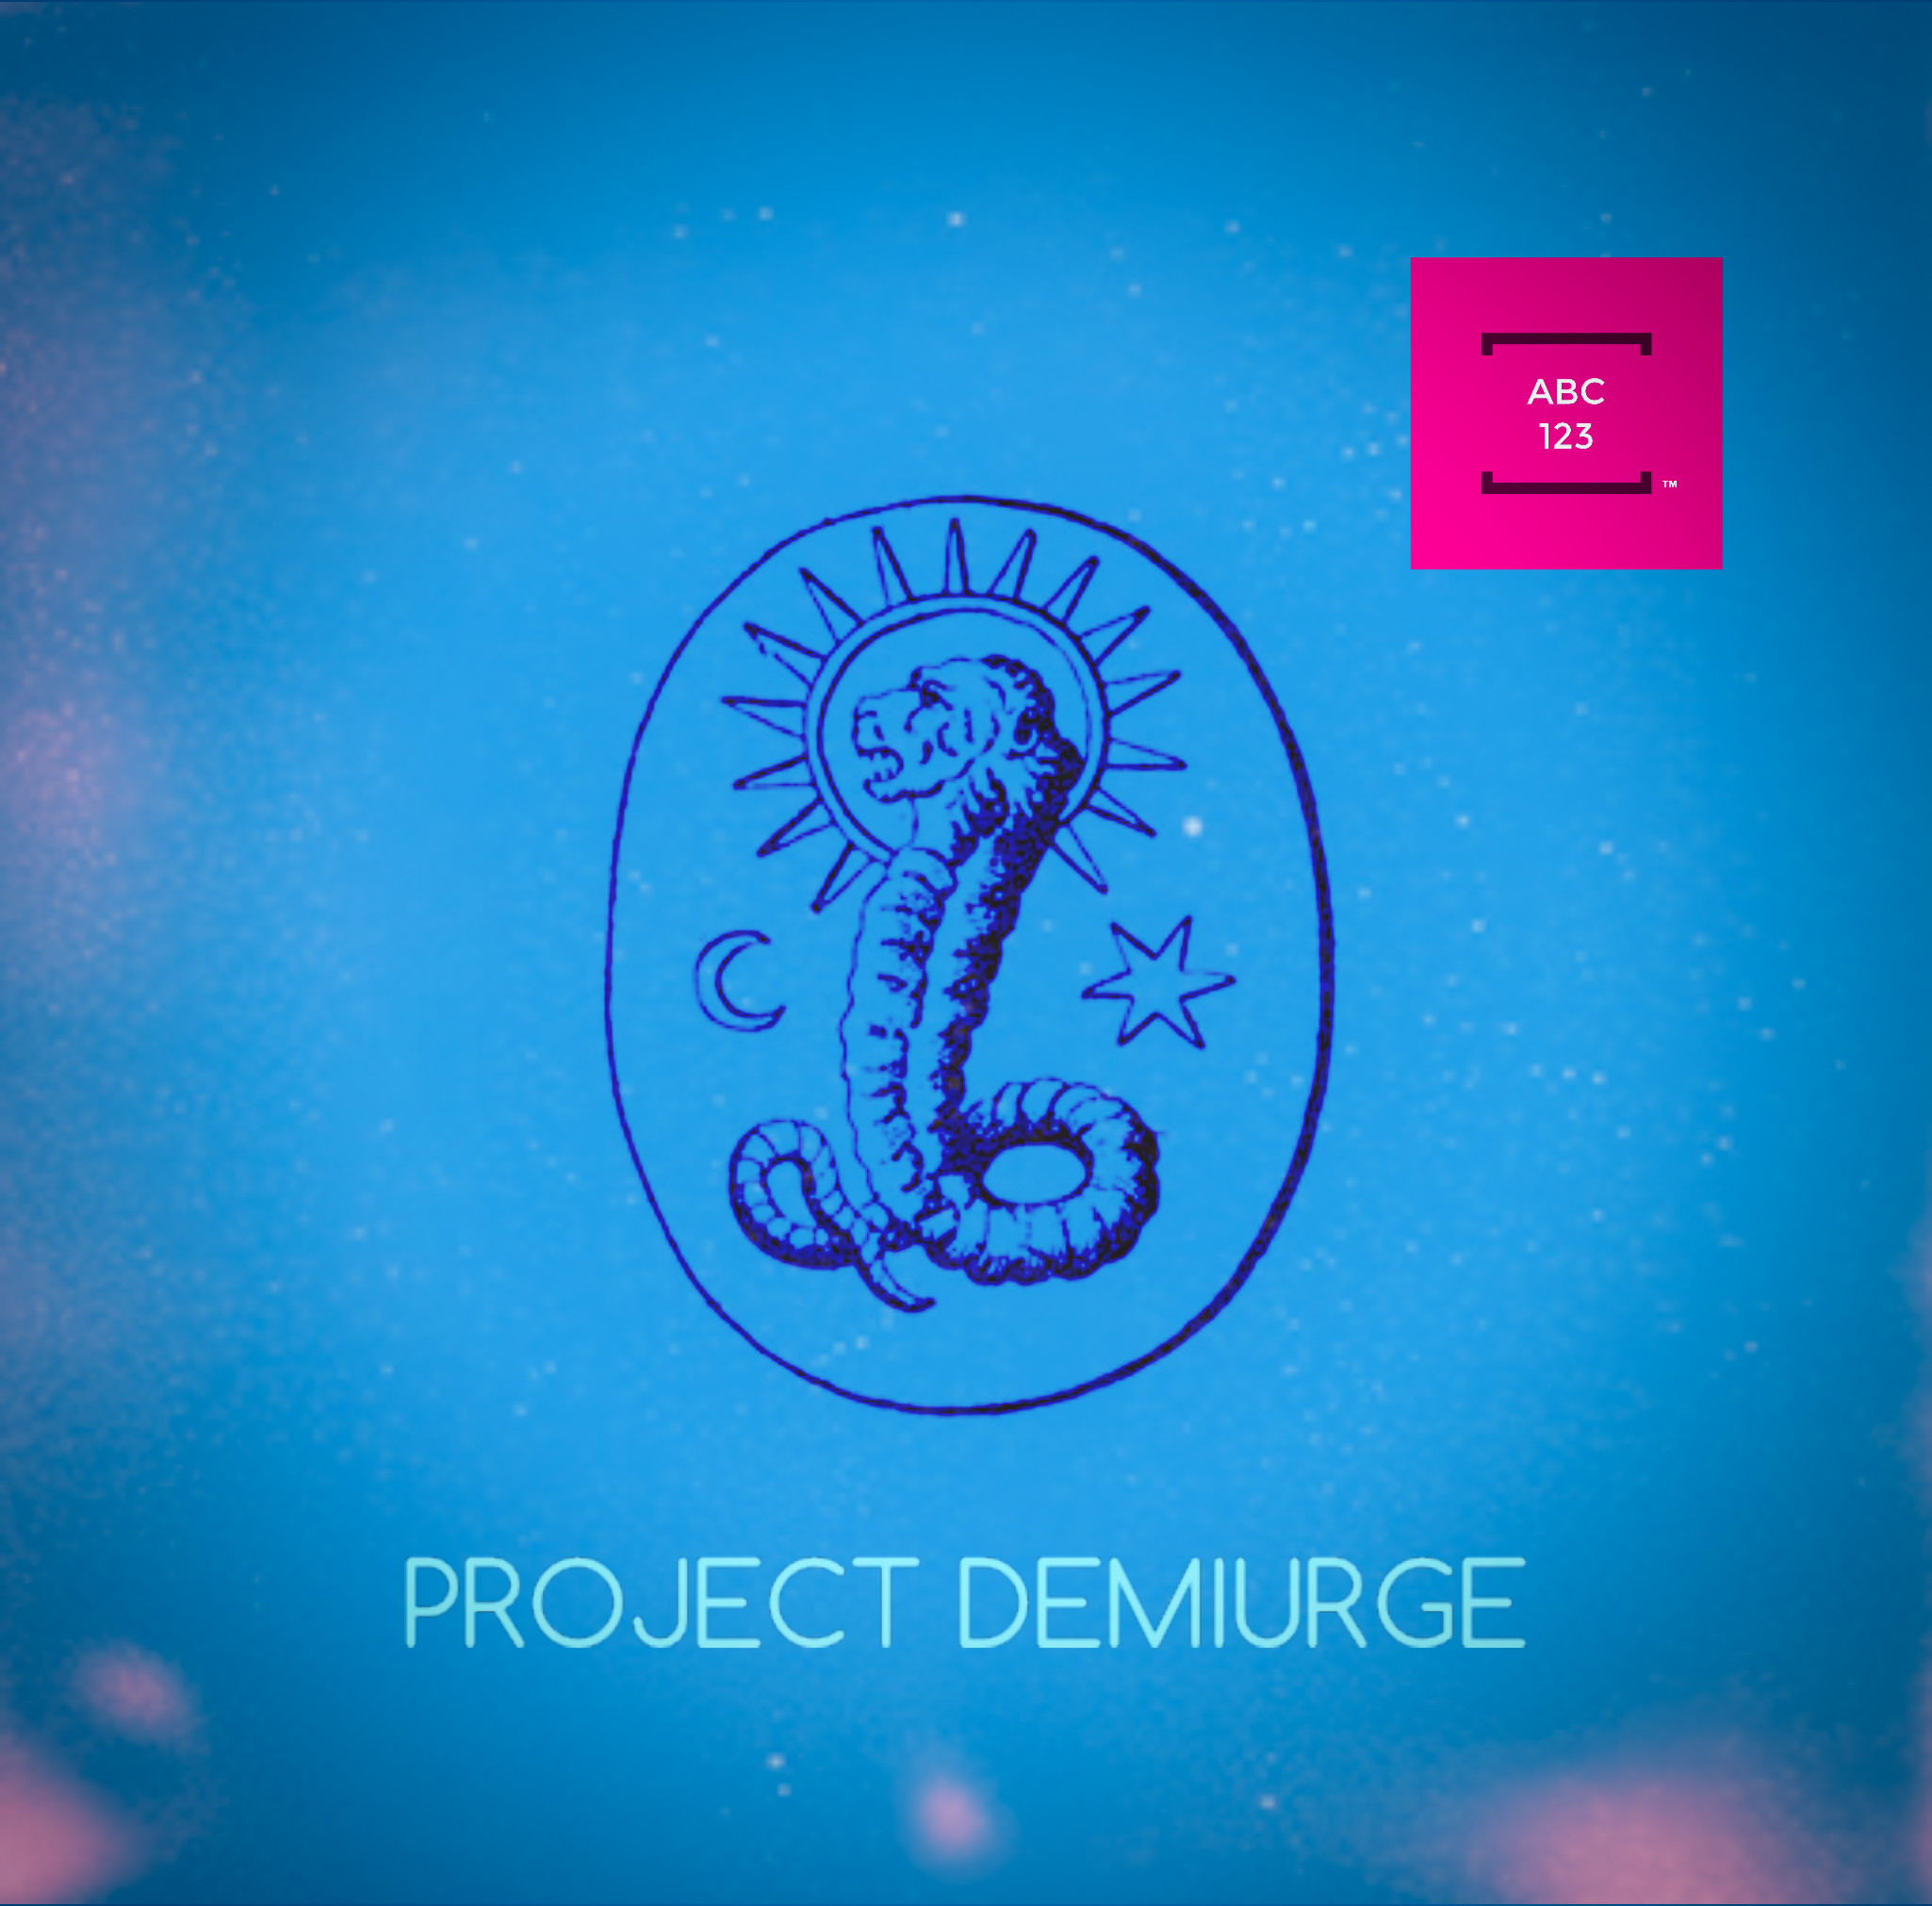

## ⬇️ EXAMPLES: ⬇️

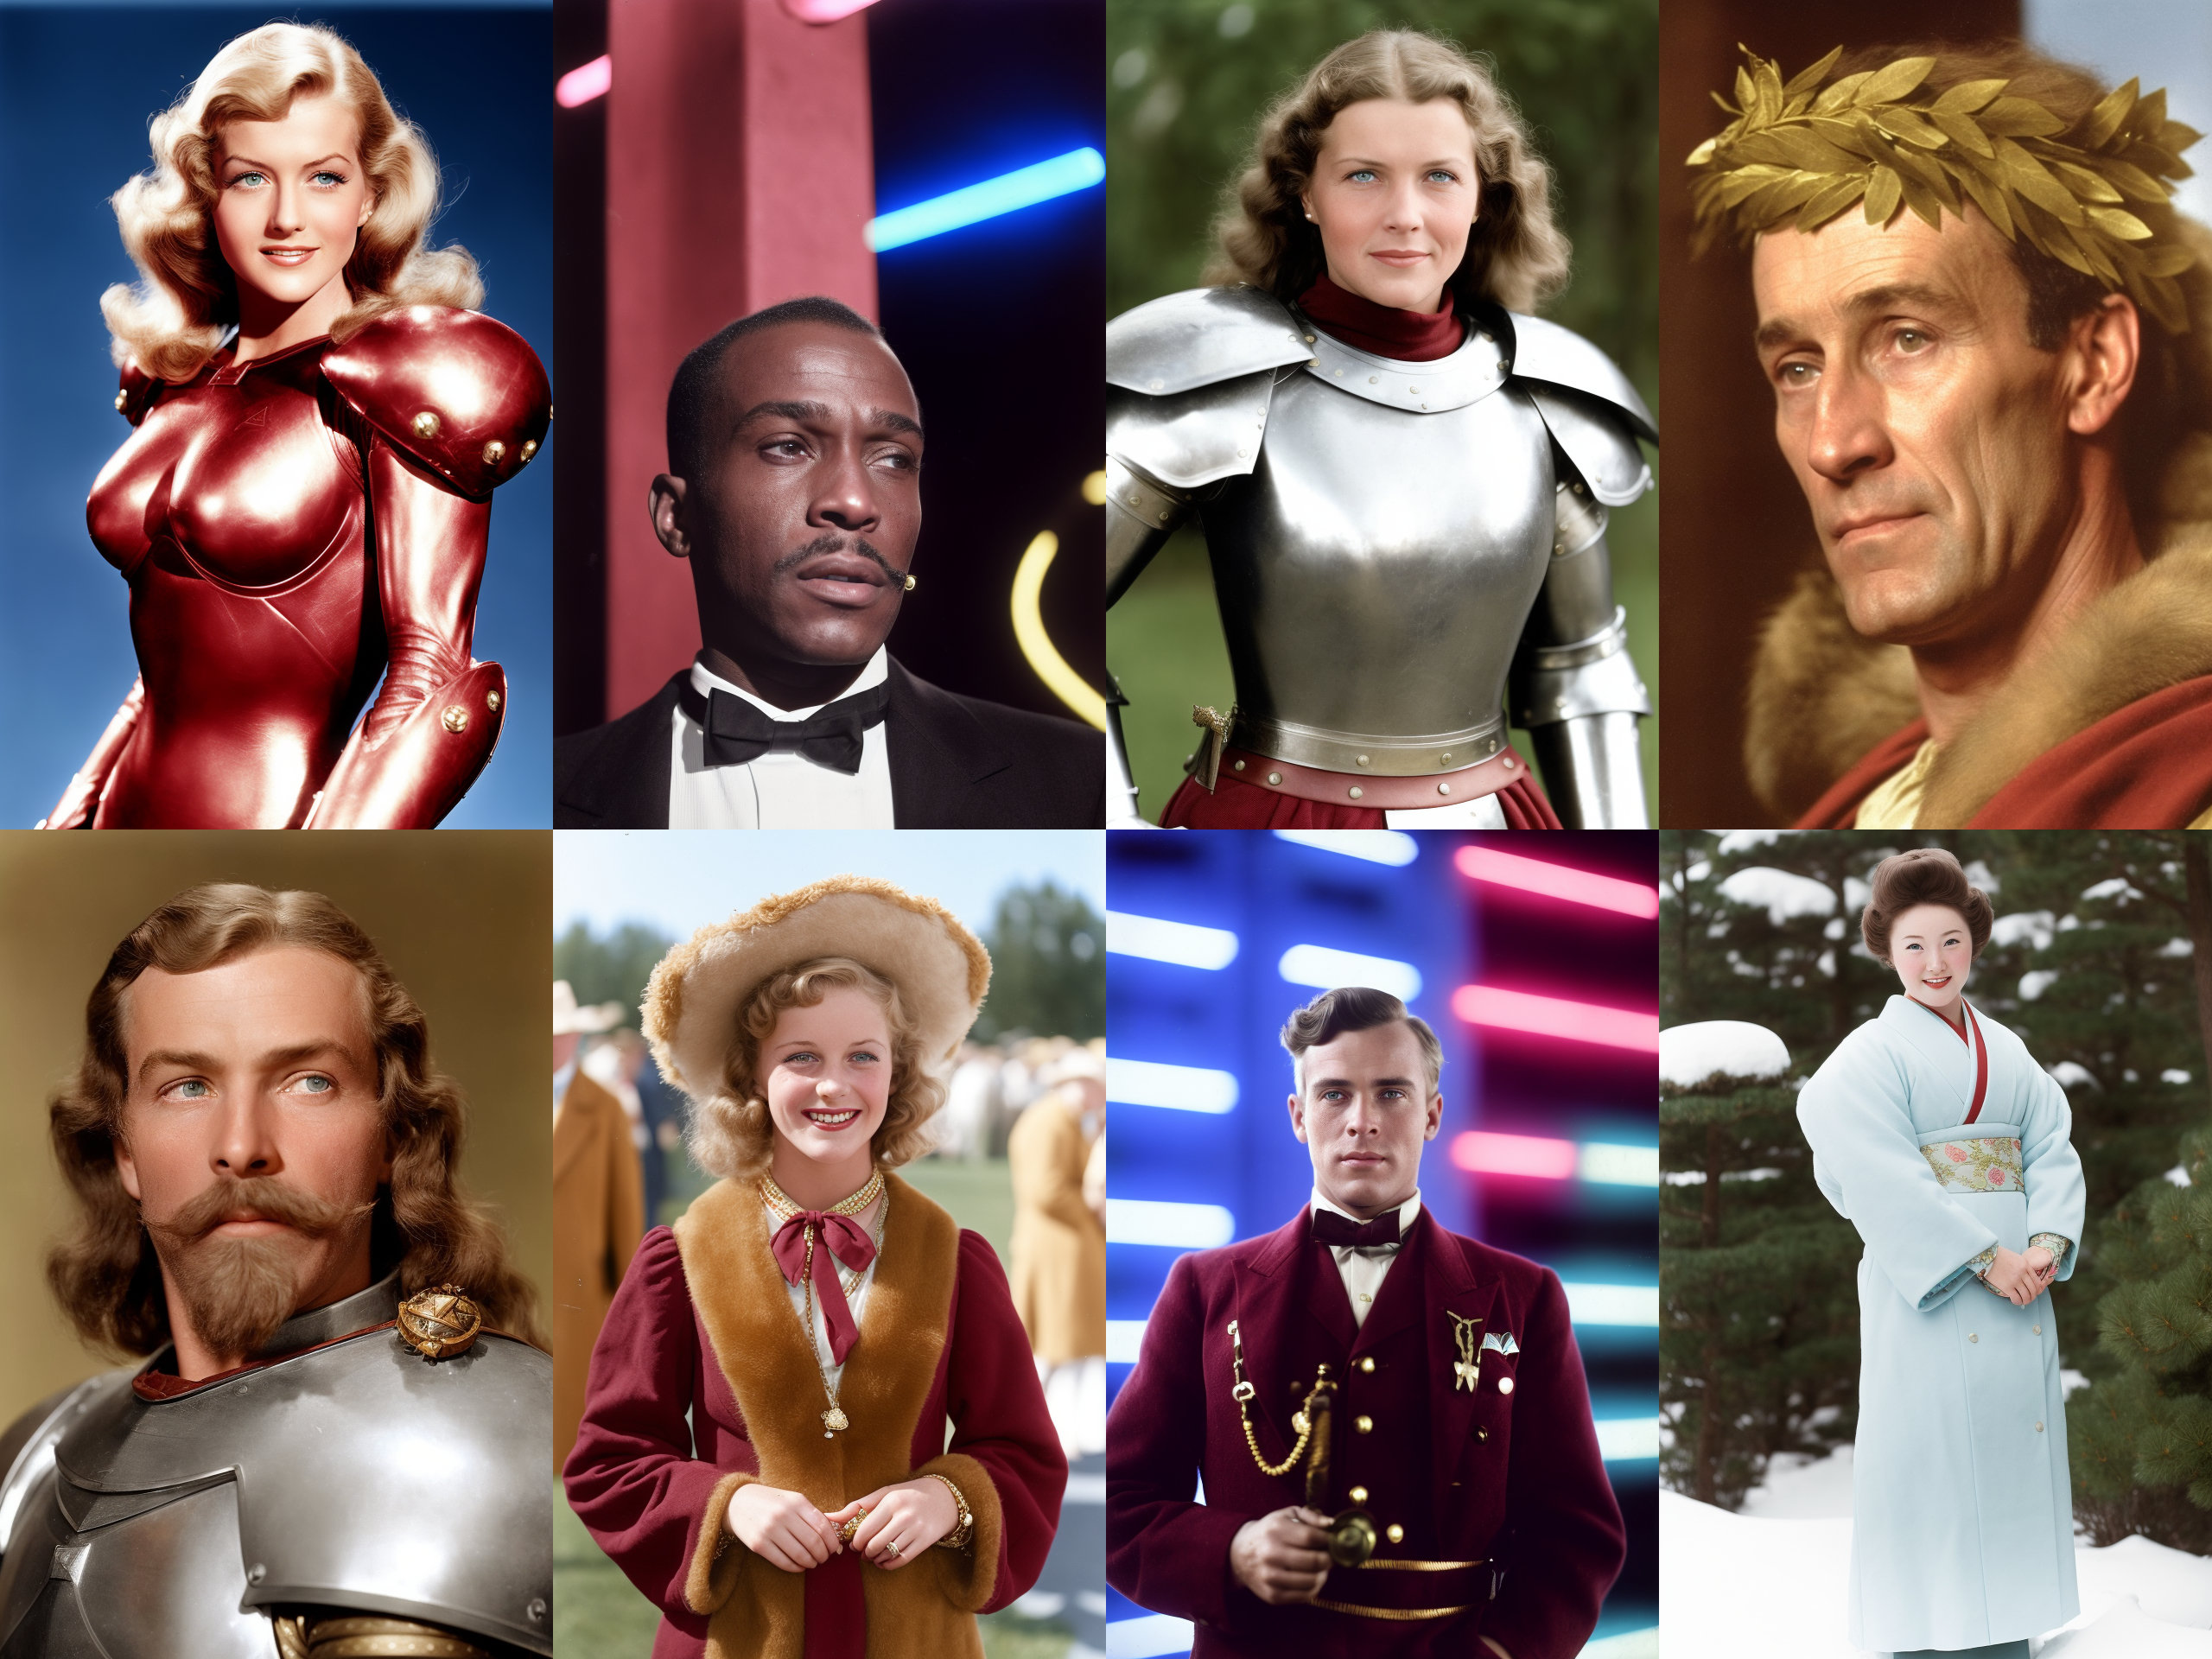

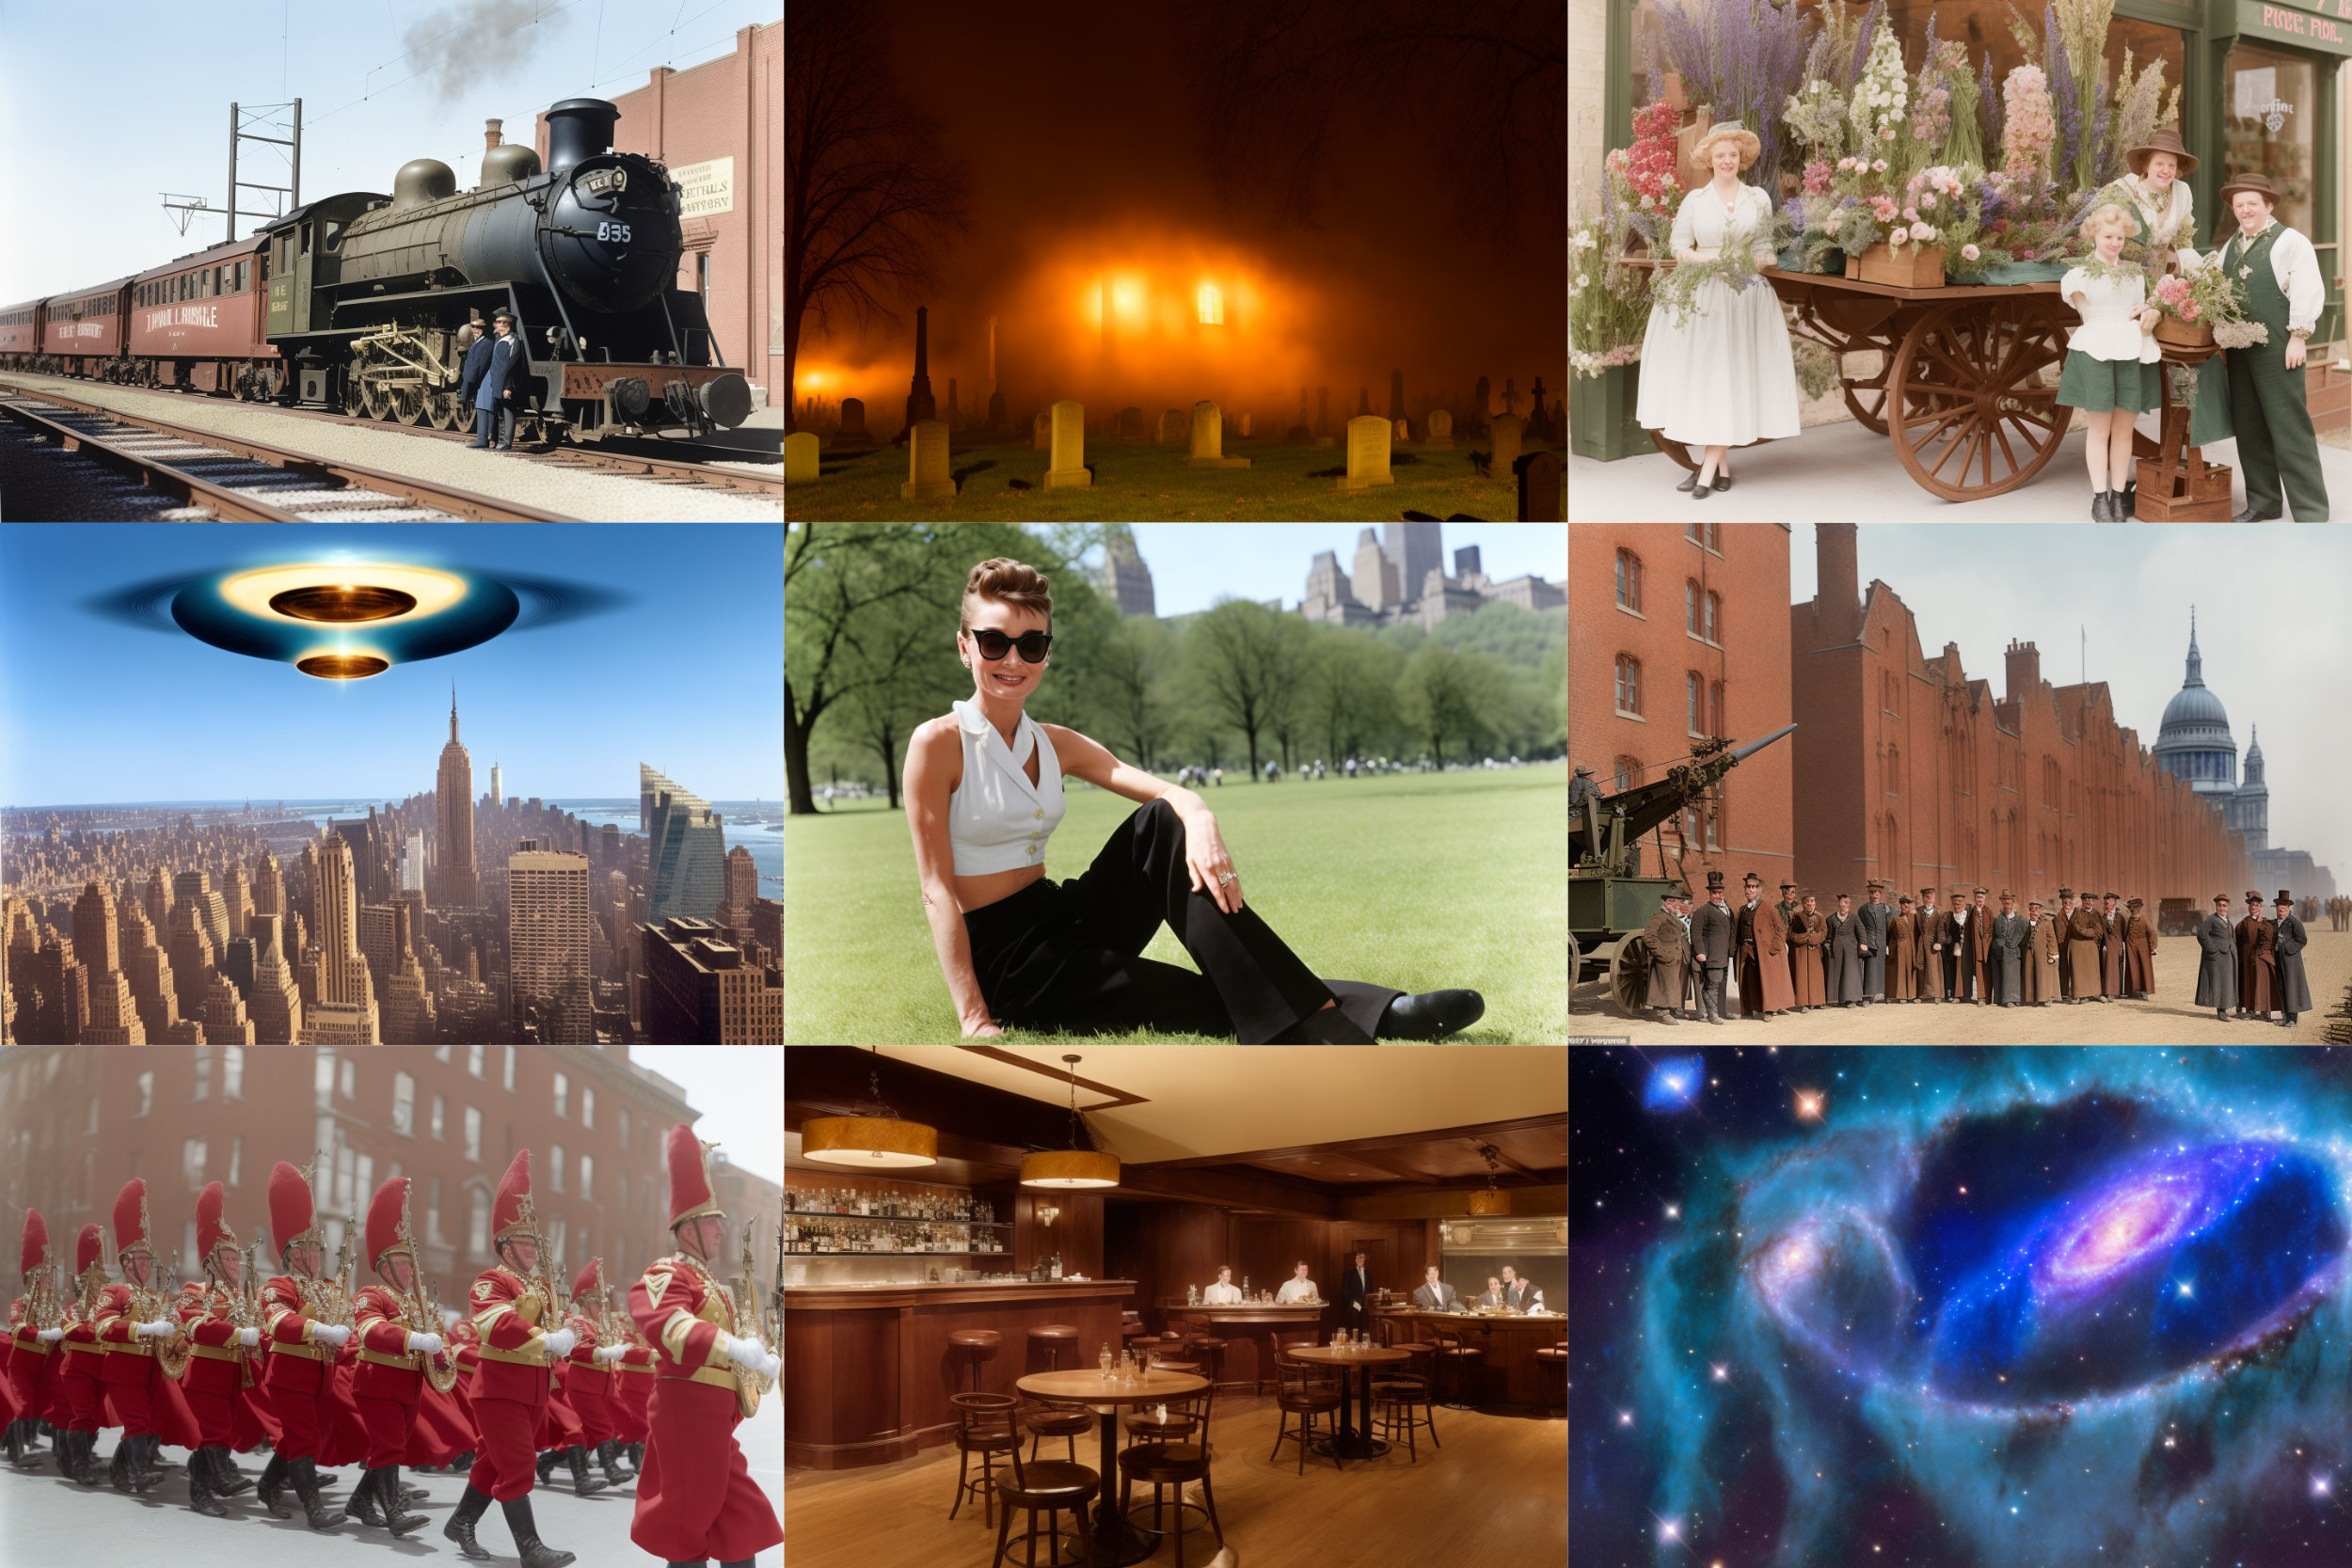

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
#@markdown # Dependencies

from IPython.utils import capture
import time

print('[1;32mInstalling dependencies...')
with capture.capture_output() as cap:
    %cd /content/
    !pip install -q --no-deps accelerate==0.12.0
    !wget -q -i https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dependencies/db.txt
    !dpkg -i *.deb
    !tar -C / --zstd -xf db_deps.tar.zst
    !rm *.deb | rm *.zst | rm *.txt
    !git clone --depth 1 --branch updt https://github.com/TheLastBen/diffusers
    %env LD_PRELOAD=libtcmalloc.so

print('[1;32mDone, proceed')

# Model Download

In [ ]:
import os
import time
from IPython.display import clear_output
import wget

#@markdown - Skip this cell if you are loading a previous session that contains a trained model.

#@markdown ---

Model_Version = "1.5" #@param [ "1.5", "V2.1-512px", "V2.1-768px"]

#@markdown - Choose which version to finetune.

with capture.capture_output() as cap: 
  %cd /content/

#@markdown ---
Custom_Model_Version="1.5" #@param [ "1.5", "V2.1-512px", "V2.1-768px"]

Path_to_HuggingFace= "wavymulder/timeless-diffusion" #@param {type:"string"}

#@markdown - Load and finetune a model from Hugging Face, must specify if v2, use the format "profile/model" like : runwayml/stable-diffusion-v1-5
#@markdown - If the custom model is private or requires a token, create token.txt containing the token in "Fast-Dreambooth" folder in your gdrive.

CKPT_Path = "" #@param {type:"string"}

CKPT_Link = "" #@param {type:"string"}

if os.path.exists('/content/gdrive/MyDrive/Fast-Dreambooth/token.txt'):
  with open("/content/gdrive/MyDrive/Fast-Dreambooth/token.txt") as f:
     token = f.read()
  authe=f'https://USER:{token}@'
else:
  authe="https://"

def downloadmodel():

  if os.path.exists('/content/stable-diffusion-v1-5'):
    !rm -r /content/stable-diffusion-v1-5
  clear_output()

  %cd /content/
  clear_output()
  !mkdir /content/stable-diffusion-v1-5
  %cd /content/stable-diffusion-v1-5
  !git init
  !git lfs install --system --skip-repo
  !git remote add -f origin  "https://huggingface.co/runwayml/stable-diffusion-v1-5"
  !git config core.sparsecheckout true
  !echo -e "scheduler\ntext_encoder\ntokenizer\nunet\nmodel_index.json\n!*.safetensors" > .git/info/sparse-checkout
  !git pull origin main
  if os.path.exists('/content/stable-diffusion-v1-5/unet/diffusion_pytorch_model.bin'):
    !git clone "https://huggingface.co/stabilityai/sd-vae-ft-mse"
    !mv /content/stable-diffusion-v1-5/sd-vae-ft-mse /content/stable-diffusion-v1-5/vae
    !rm -r /content/stable-diffusion-v1-5/.git
    %cd /content/stable-diffusion-v1-5
    !rm model_index.json
    time.sleep(1)    
    wget.download('https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/model_index.json')
    !sed -i 's@"sample_size": 256,@"sample_size": 512,@g' /content/stable-diffusion-v1-5/vae/config.json  
    %cd /content/
    clear_output()
    print('[1;32mDONE !')
  else:
    while not os.path.exists('/content/stable-diffusion-v1-5/unet/diffusion_pytorch_model.bin'):
         print('[1;31mSomething went wrong')
         time.sleep(5)

def newdownloadmodel():

  %cd /content/
  clear_output()
  !mkdir /content/stable-diffusion-v2-768
  %cd /content/stable-diffusion-v2-768
  !git init
  !git lfs install --system --skip-repo
  !git remote add -f origin  "https://huggingface.co/stabilityai/stable-diffusion-2-1"
  !git config core.sparsecheckout true
  !echo -e "scheduler\ntext_encoder\ntokenizer\nunet\nvae\nfeature_extractor\nmodel_index.json\n!*.safetensors" > .git/info/sparse-checkout
  !git pull origin main
  !rm -r /content/stable-diffusion-v2-768/.git
  clear_output()
  print('[1;32mDONE !')


def newdownloadmodelb():

  %cd /content/
  clear_output()
  !mkdir /content/stable-diffusion-v2-512
  %cd /content/stable-diffusion-v2-512
  !git init
  !git lfs install --system --skip-repo
  !git remote add -f origin  "https://huggingface.co/stabilityai/stable-diffusion-2-1-base"
  !git config core.sparsecheckout true
  !echo -e "scheduler\ntext_encoder\ntokenizer\nunet\nvae\nfeature_extractor\nmodel_index.json\n!*.safetensors" > .git/info/sparse-checkout
  !git pull origin main
  !rm -r /content/stable-diffusion-v2-512/.git
  clear_output()
  print('[1;32mDONE !')


if Path_to_HuggingFace != "":
  if Custom_Model_Version=='V2.1-512px' or Custom_Model_Version=='V2.1-768px':
    if os.path.exists('/content/stable-diffusion-custom'):
      !rm -r /content/stable-diffusion-custom
    clear_output()
    %cd /content/
    clear_output()
    !mkdir /content/stable-diffusion-custom
    %cd /content/stable-diffusion-custom
    !git init
    !git lfs install --system --skip-repo
    !git remote add -f origin  "{authe}huggingface.co/{Path_to_HuggingFace}"
    !git config core.sparsecheckout true
    !echo -e "scheduler\ntext_encoder\ntokenizer\nunet\nvae\nfeature_extractor\nmodel_index.json\n!*.safetensors" > .git/info/sparse-checkout
    !git pull origin main
    if os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
      !rm -r /content/stable-diffusion-custom/.git
      %cd /content/ 
      MODEL_NAME="/content/stable-diffusion-custom"
      clear_output()
      print('[1;32mDONE !')
    else:
      while not os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
            print('[1;31mCheck the link you provided')
            time.sleep(5)
  else:
    if os.path.exists('/content/stable-diffusion-custom'):
      !rm -r /content/stable-diffusion-custom
    clear_output()
    %cd /content/
    clear_output()
    !mkdir /content/stable-diffusion-custom
    %cd /content/stable-diffusion-custom
    !git init
    !git lfs install --system --skip-repo
    !git remote add -f origin  "{authe}huggingface.co/{Path_to_HuggingFace}"
    !git config core.sparsecheckout true
    !echo -e "scheduler\ntext_encoder\ntokenizer\nunet\nvae\nmodel_index.json\n!*.safetensors" > .git/info/sparse-checkout
    !git pull origin main
    if os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
      !rm -r /content/stable-diffusion-custom/.git
      !rm model_index.json
      time.sleep(1)
      wget.download('https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/model_index.json')
      %cd /content/ 
      MODEL_NAME="/content/stable-diffusion-custom"
      clear_output()
      print('[1;32mDONE !')
    else:
      while not os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
            print('[1;31mCheck the link you provided')
            time.sleep(5)

elif CKPT_Path !="":
  %cd /content
  clear_output() 
  if os.path.exists(str(CKPT_Path)):
    if Custom_Model_Version=='1.5':
      !wget -q -O refmdlz https://github.com/TheLastBen/fast-stable-diffusion/raw/main/Dreambooth/refmdlz
      !unzip -o -q refmdlz
      !rm -f refmdlz
      !wget -q -O convertodiff.py https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/convertodiffv1.py
      clear_output()
      !python /content/convertodiff.py "$CKPT_Path" /content/stable-diffusion-custom --v1
      !rm -r /content/refmdl
    elif Custom_Model_Version=='V2.1-512px':
      !wget -q -O convertodiff.py https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/convertodiffv2.py
      clear_output()
      !python /content/convertodiff.py "$CKPT_Path" /content/stable-diffusion-custom --v2 --reference_model stabilityai/stable-diffusion-2-1-base
    elif Custom_Model_Version=='V2.1-768px':
      !wget -q -O convertodiff.py https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/convertodiffv2.py
      clear_output()
      !python /content/convertodiff.py "$CKPT_Path" /content/stable-diffusion-custom --v2 --reference_model stabilityai/stable-diffusion-2-1
      if os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
        !wget -q -O /content/stable-diffusion-custom/unet/config.json https://huggingface.co/stabilityai/stable-diffusion-2-1/raw/main/unet/config.json      
    !rm /content/convertodiff.py
    if os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
      clear_output()
      MODEL_NAME="/content/stable-diffusion-custom"
      print('[1;32mDONE !')
    else:
      !rm -r /content/stable-diffusion-custom
      while not os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
        print('[1;31mConversion error')
        time.sleep(5)
  else:
    while not os.path.exists(str(CKPT_Path)):
       print('[1;31mWrong path, use the colab file explorer to copy the path')
       time.sleep(5)

elif CKPT_Link !="":
    %cd /content
    clear_output()
    !gdown --fuzzy -O model.ckpt $CKPT_Link
    clear_output() 
    if os.path.exists('/content/model.ckpt'):
      if os.path.getsize("/content/model.ckpt") > 1810671599:
        if Custom_Model_Version=='1.5':
          !wget -q -O refmdlz https://github.com/TheLastBen/fast-stable-diffusion/raw/main/Dreambooth/refmdlz
          !unzip -o -q refmdlz
          !rm -f refmdlz
          !wget -q -O convertodiff.py https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/convertodiffv1.py
          clear_output()
          !python /content/convertodiff.py /content/model.ckpt /content/stable-diffusion-custom --v1
          !rm -r /content/refmdl
        elif Custom_Model_Version=='V2.1-512px':
          !wget -q -O convertodiff.py https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/convertodiffv2.py
          clear_output()
          !python /content/convertodiff.py /content/model.ckpt /content/stable-diffusion-custom --v2 --reference_model stabilityai/stable-diffusion-2-1-base
        elif Custom_Model_Version=='V2.1-768px':
          !wget -q -O convertodiff.py https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/convertodiffv2.py
          clear_output()
          !python /content/convertodiff.py /content/model.ckpt /content/stable-diffusion-custom --v2 --reference_model stabilityai/stable-diffusion-2-1
          if os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
            !wget -q -O /content/stable-diffusion-custom/unet/config.json https://huggingface.co/stabilityai/stable-diffusion-2-1/raw/main/unet/config.json          
        !rm /content/convertodiff.py
        if os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
          clear_output()
          MODEL_NAME="/content/stable-diffusion-custom"
          print('[1;32mDONE !')
        else:
          !rm -r /content/stable-diffusion-custom
          !rm /content/model.ckpt
          while not os.path.exists('/content/stable-diffusion-custom/unet/diffusion_pytorch_model.bin'):
            print('[1;31mConversion error')
            time.sleep(5)
      else:
        while os.path.getsize('/content/model.ckpt') < 1810671599:
           print('[1;31mWrong link, check that the link is valid')
           time.sleep(5)

else:
  if Model_Version=="1.5":
    if not os.path.exists('/content/stable-diffusion-v1-5'):
      downloadmodel()
      MODEL_NAME="/content/stable-diffusion-v1-5"
    else:
      MODEL_NAME="/content/stable-diffusion-v1-5"
      print("[1;32mThe v1.5 model already exists, using this model.")
  elif Model_Version=="V2.1-512px":
    if not os.path.exists('/content/stable-diffusion-v2-512'):
      newdownloadmodelb()
      MODEL_NAME="/content/stable-diffusion-v2-512"
    else:
      MODEL_NAME="/content/stable-diffusion-v2-512"
      print("[1;32mThe v2-512px model already exists, using this model.")
  elif Model_Version=="V2.1-768px":
    if not os.path.exists('/content/stable-diffusion-v2-768'):
      newdownloadmodel()
      MODEL_NAME="/content/stable-diffusion-v2-768"
    else:
      MODEL_NAME="/content/stable-diffusion-v2-768"
      print("[1;32mThe v2-768px model already exists, using this model.")

# Dreambooth

In [ ]:
import os
from IPython.display import clear_output
from IPython.utils import capture
from os import listdir
from os.path import isfile
import wget
import time

#@markdown #Create/Load a Session

try:
  MODEL_NAME
  pass
except:
  MODEL_NAME=""
  
PT=""

Session_Name = "" #@param{type: 'string'}
while Session_Name=="":
  print('[1;31mInput the Session Name:') 
  Session_Name=input('')
Session_Name=Session_Name.replace(" ","_")

#@markdown - Enter the session name, it if it exists, it will load it, otherwise it'll create an new session.

Session_Link_optional = "" #@param{type: 'string'}

#@markdown - Import a session from another gdrive, the shared gdrive link must point to the specific session's folder that contains the trained CKPT, remove any intermediary CKPT if any.

WORKSPACE='/content/gdrive/MyDrive/Fast-Dreambooth'

if Session_Link_optional !="":
  print('[1;32mDownloading session...')
  with capture.capture_output() as cap:
    %cd /content
    if not os.path.exists(str(WORKSPACE+'/Sessions')):
      %mkdir -p $WORKSPACE'/Sessions'
      time.sleep(1)
    %cd $WORKSPACE'/Sessions'
    !gdown --folder --remaining-ok -O $Session_Name  $Session_Link_optional
    %cd $Session_Name
    !rm -r instance_images
    !unzip instance_images.zip
    !rm -r concept_images
    !unzip concept_images.zip
    !rm -r captions
    !unzip captions.zip
    %cd /content


INSTANCE_NAME=Session_Name
OUTPUT_DIR="/content/models/"+Session_Name
SESSION_DIR=WORKSPACE+'/Sessions/'+Session_Name
INSTANCE_DIR=SESSION_DIR+'/instance_images'
CONCEPT_DIR=SESSION_DIR+'/concept_images'
CAPTIONS_DIR=SESSION_DIR+'/captions'
MDLPTH=str(SESSION_DIR+"/"+Session_Name+'.ckpt')

Model_Version = "1.5" #@param [ "1.5", "V2.1-512px", "V2.1-768px"]
#@markdown - Ignore this if you're not loading a previous session that contains a trained model


if os.path.exists(str(SESSION_DIR)):
  mdls=[ckpt for ckpt in listdir(SESSION_DIR) if ckpt.split(".")[-1]=="ckpt"]
  if not os.path.exists(MDLPTH) and '.ckpt' in str(mdls):  
    
    def f(n):
      k=0
      for i in mdls:
        if k==n:
          !mv "$SESSION_DIR/$i" $MDLPTH
        k=k+1

    k=0
    print('[1;33mNo final checkpoint model found, select which intermediary checkpoint to use, enter only the number, (000 to skip):\n[1;34m')

    for i in mdls:
      print(str(k)+'- '+i)
      k=k+1
    n=input()
    while int(n)>k-1:
      n=input()
    if n!="000":
      f(int(n))
      print('[1;32mUsing the model '+ mdls[int(n)]+" ...")
      time.sleep(2)
    else:
      print('[1;32mSkipping the intermediary checkpoints.')
    del n

with capture.capture_output() as cap:
  %cd /content
  resume=False

if os.path.exists(str(SESSION_DIR)) and not os.path.exists(MDLPTH):
  print('[1;32mLoading session with no previous model, using the original model or the custom downloaded model')
  if MODEL_NAME=="":
    print('[1;31mNo model found, use the "Model Download" cell to download a model.')
  else:
    print('[1;32mSession Loaded, proceed to uploading instance images')

elif os.path.exists(MDLPTH):
  print('[1;32mSession found, loading the trained model ...')
  if Model_Version=='1.5':
    !wget -q -O refmdlz https://github.com/TheLastBen/fast-stable-diffusion/raw/main/Dreambooth/refmdlz
    !unzip -o -q refmdlz
    !rm -f refmdlz
    !wget -q -O convertodiff.py https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/convertodiffv1.py
    clear_output()
    print('[1;32mSession found, loading the trained model ...')
    !python /content/convertodiff.py "$MDLPTH" "$OUTPUT_DIR" --v1
    !rm -r /content/refmdl
  elif Model_Version=='V2.1-512px':
    !wget -q -O convertodiff.py https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/convertodiffv2.py
    clear_output()
    print('[1;32mSession found, loading the trained model ...')
    !python /content/convertodiff.py "$MDLPTH" "$OUTPUT_DIR" --v2 --reference_model stabilityai/stable-diffusion-2-1-base
  elif Model_Version=='V2.1-768px':
    !wget -q -O convertodiff.py https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/convertodiffv2.py
    clear_output()
    print('[1;32mSession found, loading the trained model ...')
    !python /content/convertodiff.py "$MDLPTH" "$OUTPUT_DIR" --v2 --reference_model stabilityai/stable-diffusion-2-1
    if os.path.exists(OUTPUT_DIR+'/unet/diffusion_pytorch_model.bin'):
      !wget -q -O $OUTPUT_DIR/unet/config.json https://huggingface.co/stabilityai/stable-diffusion-2-1/raw/main/unet/config.json    
  !rm /content/convertodiff.py  
  if os.path.exists(OUTPUT_DIR+'/unet/diffusion_pytorch_model.bin'):
    resume=True
    clear_output()
    print('[1;32mSession loaded.')
  else:     
    if not os.path.exists(OUTPUT_DIR+'/unet/diffusion_pytorch_model.bin'):
      print('[1;31mConversion error, if the error persists, remove the CKPT file from the current session folder')

elif not os.path.exists(str(SESSION_DIR)):
    %mkdir -p "$INSTANCE_DIR"
    print('[1;32mCreating session...')
    if MODEL_NAME=="":
      print('[1;31mNo model found, use the "Model Download" cell to download a model.')
    else:
      print('[1;32mSession created, proceed to uploading instance images')

    #@markdown

    #@markdown # The most importent step is to rename the instance pictures of each subject to a unique unknown identifier, example :
    #@markdown - If you have 30 pictures of yourself, simply select them all and rename only one to the chosen identifier for example : phtmejhn, the files would be : phtmejhn (1).jpg, phtmejhn (2).png ....etc then upload them, do the same for other people or objects with a different identifier, and that's it.
    #@markdown - Check out this example : https://i.imgur.com/d2lD3rz.jpeg

In [ ]:
import shutil
from google.colab import files
import time
from PIL import Image
from tqdm import tqdm
import ipywidgets as widgets
from io import BytesIO
import wget

with capture.capture_output() as cap:
  %cd /content
  if not os.path.exists("/content/smart_crop.py"):
    wget.download('https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/Dreambooth/smart_crop.py')
  from smart_crop import *

#@markdown #Instance Images
#@markdown ----

#@markdown
#@markdown - Run the cell to upload the instance pictures.
#@markdown - You can add `external captions` in txt files by simply giving each txt file the same name as the instance image, for example dikgur (1).jpg and dikgur (1).txt, and upload them here, to use the external captions, check the box "external_captions" in the training cell. `All the images must have one same extension` jpg or png or....etc

Remove_existing_instance_images= True #@param{type: 'boolean'}
#@markdown - Uncheck the box to keep the existing instance images.

if Remove_existing_instance_images:
  if os.path.exists(str(INSTANCE_DIR)):
    !rm -r "$INSTANCE_DIR"
  if os.path.exists(str(CAPTIONS_DIR)):
    !rm -r "$CAPTIONS_DIR"

if not os.path.exists(str(INSTANCE_DIR)):
  %mkdir -p "$INSTANCE_DIR"
if not os.path.exists(str(CAPTIONS_DIR)):
  %mkdir -p "$CAPTIONS_DIR"

if os.path.exists(INSTANCE_DIR+"/.ipynb_checkpoints"):
  %rm -r $INSTANCE_DIR"/.ipynb_checkpoints"


IMAGES_FOLDER_OPTIONAL="" #@param{type: 'string'}

#@markdown - If you prefer to specify directly the folder of the pictures instead of uploading, this will add the pictures to the existing (if any) instance images. Leave EMPTY to upload.

Smart_Crop_images= True #@param{type: 'boolean'}
Crop_size = 512 #@param ["512", "576", "640", "704", "768", "832", "896", "960", "1024"] {type:"raw"}

#@markdown - Smart crop the images without manual intervention.

while IMAGES_FOLDER_OPTIONAL !="" and not os.path.exists(str(IMAGES_FOLDER_OPTIONAL)):
  print('[1;31mThe image folder specified does not exist, use the colab file explorer to copy the path :')
  IMAGES_FOLDER_OPTIONAL=input('')

if IMAGES_FOLDER_OPTIONAL!="":
  with capture.capture_output() as cap:
    !mv $IMAGES_FOLDER_OPTIONAL/*.txt $CAPTIONS_DIR
  if Smart_Crop_images:
    for filename in tqdm(os.listdir(IMAGES_FOLDER_OPTIONAL), bar_format='  |{bar:15}| {n_fmt}/{total_fmt} Uploaded'):
      extension = filename.split(".")[-1]
      identifier=filename.split(".")[0]
      new_path_with_file = os.path.join(INSTANCE_DIR, filename)
      file = Image.open(IMAGES_FOLDER_OPTIONAL+"/"+filename)
      width, height = file.size
      if file.size !=(Crop_size, Crop_size):
        image=crop_image(file, Crop_size)
        if extension.upper() == "JPG" or "jpg":
            image[0].save(new_path_with_file, format="JPEG", quality = 100)
        else:
            image[0].save(new_path_with_file, format=extension.upper())
      else:
        !cp "$IMAGES_FOLDER_OPTIONAL/$filename" "$INSTANCE_DIR"

  else:
    for filename in tqdm(os.listdir(IMAGES_FOLDER_OPTIONAL), bar_format='  |{bar:15}| {n_fmt}/{total_fmt} Uploaded'):
      %cp -r "$IMAGES_FOLDER_OPTIONAL/$filename" "$INSTANCE_DIR"

  print('\n[1;32mDone, proceed to the next cell')


elif IMAGES_FOLDER_OPTIONAL =="":
  up=""
  uploaded = files.upload()
  for filename in uploaded.keys():
    if filename.split(".")[-1]=="txt":
      shutil.move(filename, CAPTIONS_DIR)
    up=[filename for filename in uploaded.keys() if filename.split(".")[-1]!="txt"]
  if Smart_Crop_images:
    for filename in tqdm(up, bar_format='  |{bar:15}| {n_fmt}/{total_fmt} Uploaded'):
      shutil.move(filename, INSTANCE_DIR)
      extension = filename.split(".")[-1]
      identifier=filename.split(".")[0]
      new_path_with_file = os.path.join(INSTANCE_DIR, filename)
      file = Image.open(new_path_with_file)
      width, height = file.size
      if file.size !=(Crop_size, Crop_size):
        image=crop_image(file, Crop_size)
        if extension.upper() == "JPG" or "jpg":
            image[0].save(new_path_with_file, format="JPEG", quality = 100)
        else:
            image[0].save(new_path_with_file, format=extension.upper())
      clear_output()
  else:
    for filename in tqdm(uploaded.keys(), bar_format='  |{bar:15}| {n_fmt}/{total_fmt} Uploaded'):
      shutil.move(filename, INSTANCE_DIR)
      clear_output()
  print('\n[1;32mDone, proceed to the next cell')

with capture.capture_output() as cap:
  %cd "$INSTANCE_DIR"
  !find . -name "* *" -type f | rename 's/ /-/g'
  %cd "$CAPTIONS_DIR"
  !find . -name "* *" -type f | rename 's/ /-/g'
  
  %cd $SESSION_DIR
  !rm instance_images.zip captions.zip
  !zip -r instance_images instance_images
  !zip -r captions captions
  %cd /content

In [ ]:
import ipywidgets as widgets
from io import BytesIO
#@markdown #Captions

#@markdown - Open a tool to manually `create` captions or edit existing captions of the instance images.

paths=""
out=""
widgets_l=""
clear_output()
def Caption(path):
    if path!="Select an instance image to caption":
      
      name = os.path.splitext(os.path.basename(path))[0]
      ext=os.path.splitext(os.path.basename(path))[-1][1:]
      if ext=="jpg" or "JPG":
        ext="JPEG"      

      if os.path.exists(CAPTIONS_DIR+"/"+name + '.txt'):
        with open(CAPTIONS_DIR+"/"+name + '.txt', 'r') as f:
            text = f.read()
      else:
        with open(CAPTIONS_DIR+"/"+name + '.txt', 'w') as f:
            f.write("")
            with open(CAPTIONS_DIR+"/"+name + '.txt', 'r') as f:
                text = f.read()   

      img=Image.open(os.path.join(INSTANCE_DIR,path))
      img=img.resize((420, 420))
      image_bytes = BytesIO()
      img.save(image_bytes, format=ext, qualiy=10)
      image_bytes.seek(0)
      image_data = image_bytes.read()
      img= image_data  
      image = widgets.Image(
          value=img,
          width=420,
          height=420
      )
      text_area = widgets.Textarea(value=text, description='', disabled=False, layout={'width': '300px', 'height': '120px'})
      

      def update_text(text):
          with open(CAPTIONS_DIR+"/"+name + '.txt', 'w') as f:
              f.write(text)

      button = widgets.Button(description='Save', button_style='success')
      button.on_click(lambda b: update_text(text_area.value))

      return widgets.VBox([widgets.HBox([image, text_area, button])])


paths = os.listdir(INSTANCE_DIR)
widgets_l = widgets.Select(options=["Select an instance image to caption"]+paths, rows=25)


out = widgets.Output()

def click(change):
    with out:
        out.clear_output()
        display(Caption(change.new))

widgets_l.observe(click, names='value')
display(widgets.HBox([widgets_l, out]))

In [ ]:
import shutil
from google.colab import files
from PIL import Image
from tqdm import tqdm

#@markdown #Concept Images (Regularization)
#@markdown ----

#@markdown
#@markdown - Run this `optional` cell to upload concept pictures. If you're traning on a specific face, skip this cell.

Remove_existing_concept_images= True #@param{type: 'boolean'}
#@markdown - Uncheck the box to keep the existing concept images.

if Remove_existing_concept_images:
  if os.path.exists(str(CONCEPT_DIR)):
    !rm -r "$CONCEPT_DIR"

if not os.path.exists(str(CONCEPT_DIR)):
  %mkdir -p "$CONCEPT_DIR"

IMAGES_FOLDER_OPTIONAL="" #@param{type: 'string'}

#@markdown - If you prefer to specify directly the folder of the pictures instead of uploading, this will add the pictures to the existing (if any) concept images. Leave EMPTY to upload.

Smart_Crop_images= True
Crop_size = 512

while IMAGES_FOLDER_OPTIONAL !="" and not os.path.exists(str(IMAGES_FOLDER_OPTIONAL)):
  print('[1;31mThe image folder specified does not exist, use the colab file explorer to copy the path :')
  IMAGES_FOLDER_OPTIONAL=input('')

if IMAGES_FOLDER_OPTIONAL!="":
  if Smart_Crop_images:
    for filename in tqdm(os.listdir(IMAGES_FOLDER_OPTIONAL), bar_format='  |{bar:15}| {n_fmt}/{total_fmt} Uploaded'):
      extension = filename.split(".")[-1]
      identifier=filename.split(".")[0]
      new_path_with_file = os.path.join(CONCEPT_DIR, filename)
      file = Image.open(IMAGES_FOLDER_OPTIONAL+"/"+filename)
      width, height = file.size
      if file.size !=(Crop_size, Crop_size):
        image=crop_image(file, Crop_size)
        if extension.upper() == "JPG" or "jpg":
            image[0].save(new_path_with_file, format="JPEG", quality = 100)
        else:
            image[0].save(new_path_with_file, format=extension.upper())
      else:
        !cp "$IMAGES_FOLDER_OPTIONAL/$filename" "$CONCEPT_DIR"

  else:
    for filename in tqdm(os.listdir(IMAGES_FOLDER_OPTIONAL), bar_format='  |{bar:15}| {n_fmt}/{total_fmt} Uploaded'):
      %cp -r "$IMAGES_FOLDER_OPTIONAL/$filename" "$CONCEPT_DIR"

elif IMAGES_FOLDER_OPTIONAL =="":
  uploaded = files.upload()
  if Smart_Crop_images:
    for filename in tqdm(uploaded.keys(), bar_format='  |{bar:15}| {n_fmt}/{total_fmt} Uploaded'):
      shutil.move(filename, CONCEPT_DIR)
      extension = filename.split(".")[-1]
      identifier=filename.split(".")[0]
      new_path_with_file = os.path.join(CONCEPT_DIR, filename)
      file = Image.open(new_path_with_file)
      width, height = file.size
      if file.size !=(Crop_size, Crop_size):
        image=crop_image(file, Crop_size)
        if extension.upper() == "JPG" or "jpg":
            image[0].save(new_path_with_file, format="JPEG", quality = 100)
        else:
            image[0].save(new_path_with_file, format=extension.upper())
      clear_output()
  else:
    for filename in tqdm(uploaded.keys(), bar_format='  |{bar:15}| {n_fmt}/{total_fmt} Uploaded'):
      shutil.move(filename, CONCEPT_DIR)
      clear_output()


print('\n[1;32mAlmost done...')
with capture.capture_output() as cap:
  i=0
  for filename in os.listdir(CONCEPT_DIR):
    extension = filename.split(".")[-1]
    identifier=filename.split(".")[0]
    new_path_with_file = os.path.join(CONCEPT_DIR, "conceptimagedb"+str(i)+"."+extension)
    filepath=os.path.join(CONCEPT_DIR,filename)
    !mv "$filepath" $new_path_with_file
    i=i+1

  %cd $SESSION_DIR
  !rm concept_images.zip
  !zip -r concept_images concept_images
  %cd /content

print('\n[1;32mDone, proceed to the training cell')

# Training

In [ ]:
#@markdown ---
#@markdown #Start DreamBooth
#@markdown ---
import os
from subprocess import getoutput
from IPython.display import clear_output
from google.colab import runtime
import time
import random

if os.path.exists(INSTANCE_DIR+"/.ipynb_checkpoints"):
  %rm -r $INSTANCE_DIR"/.ipynb_checkpoints"

if os.path.exists(CONCEPT_DIR+"/.ipynb_checkpoints"):
  %rm -r $CONCEPT_DIR"/.ipynb_checkpoints"

if os.path.exists(CAPTIONS_DIR+"/.ipynb_checkpoints"):
  %rm -r $CAPTIONS_DIR"/.ipynb_checkpoints"

Resume_Training = False #@param {type:"boolean"}

if resume and not Resume_Training:
  print('[1;31mOverwrite your previously trained model ? answering "yes" will train a new model, answering "no" will resume the training of the previous model?  yes or no ?[0m')
  while True:
    ansres=input('')
    if ansres=='no':
      Resume_Training = True
      break
    elif ansres=='yes':
      Resume_Training = False
      resume= False
      break

while not Resume_Training and MODEL_NAME=="":
  print('[1;31mNo model found, use the "Model Download" cell to download a model.')
  time.sleep(5)

#@markdown  - If you're not satisfied with the result, check this box, run again the cell and it will continue training the current model.

MODELT_NAME=MODEL_NAME

UNet_Training_Steps=1000 #@param{type: 'number'}
UNet_Learning_Rate = 5e-6 #@param ["2e-5","1e-5","9e-6","8e-6","7e-6","6e-6","5e-6", "4e-6", "3e-6", "2e-6"] {type:"raw"}
untlr=UNet_Learning_Rate

#@markdown - These default settings are for a dataset of 10 pictures which is enough for training a face, start with 650 or lower, test the model, if not enough, resume training for 150 steps, keep testing until you get the desired output, `set it to 0 to train only the text_encoder`.

Text_Encoder_Training_Steps=250 #@param{type: 'number'}

#@markdown - 200-450 steps is enough for a small dataset, keep this number small to avoid overfitting, set to 0 to disable, `set it to 0 before resuming training if it is already trained`.

Text_Encoder_Concept_Training_Steps=0 #@param{type: 'number'}

#@markdown - Suitable for training a style/concept as it acts as heavy regularization, set it to 1500 steps for 200 concept images (you can go higher), set to 0 to disable, set both the settings above to 0 to fintune only the text_encoder on the concept, `set it to 0 before resuming training if it is already trained`.

Text_Encoder_Learning_Rate = 1e-6 #@param ["2e-6", "1e-6","8e-7","6e-7","5e-7","4e-7"] {type:"raw"}
txlr=Text_Encoder_Learning_Rate

#@markdown - Learning rate for both text_encoder and concept_text_encoder, keep it low to avoid overfitting (1e-6 is higher than 4e-7)

trnonltxt=""
if UNet_Training_Steps==0:
   trnonltxt="--train_only_text_encoder"

Seed=''

External_Captions = False #@param {type:"boolean"}
#@markdown - Get the captions from a text file for each instance image.
extrnlcptn=""
if External_Captions:
  extrnlcptn="--external_captions"


Style_Training = False #@param {type:"boolean"}

#@markdown - Further reduce overfitting, suitable when training a style or a general theme, don't check the box at the beginning, check it after training for at least 1000 steps. (Has no effect when using External Captions)

Style=""
if Style_Training:
  Style="--Style"

Resolution = "512" #@param ["512", "576", "640", "704", "768", "832", "896", "960", "1024"]
Res=int(Resolution)

#@markdown - Higher resolution = Higher quality, make sure the instance images are cropped to this selected size (or larger).

fp16 = True

if Seed =='' or Seed=='0':
  Seed=random.randint(1, 999999)
else:
  Seed=int(Seed)

GC="--gradient_checkpointing"

if fp16:
  prec="fp16"
else:
  prec="no"

s = getoutput('nvidia-smi')
if 'A100' in s:
  GC=""
GCUNET=GC
if Res<=640:
  GCUNET=""

precision=prec

resuming=""
if Resume_Training and os.path.exists(OUTPUT_DIR+'/unet/diffusion_pytorch_model.bin'):
  MODELT_NAME=OUTPUT_DIR
  print('[1;32mResuming Training...[0m')
  resuming="Yes"
elif Resume_Training and not os.path.exists(OUTPUT_DIR+'/unet/diffusion_pytorch_model.bin'):
  print('[1;31mPrevious model not found, training a new model...[0m')
  MODELT_NAME=MODEL_NAME
  while MODEL_NAME=="":
    print('[1;31mNo model found, use the "Model Download" cell to download a model.')
    time.sleep(5)

Enable_text_encoder_training= True
Enable_Text_Encoder_Concept_Training= True

if Text_Encoder_Training_Steps==0 :
   Enable_text_encoder_training= False
else:
  stptxt=Text_Encoder_Training_Steps

if Text_Encoder_Concept_Training_Steps==0:
   Enable_Text_Encoder_Concept_Training= False
else:
  stptxtc=Text_Encoder_Concept_Training_Steps

#@markdown ---------------------------
Save_Checkpoint_Every_n_Steps = False #@param {type:"boolean"}
Save_Checkpoint_Every=500 #@param{type: 'number'}
if Save_Checkpoint_Every==None:
  Save_Checkpoint_Every=1
#@markdown - Minimum 200 steps between each save.
stp=0
Start_saving_from_the_step=500 #@param{type: 'number'}
if Start_saving_from_the_step==None:
  Start_saving_from_the_step=0
if (Start_saving_from_the_step < 200):
  Start_saving_from_the_step=Save_Checkpoint_Every
stpsv=Start_saving_from_the_step
if Save_Checkpoint_Every_n_Steps:
  stp=Save_Checkpoint_Every
#@markdown - Start saving intermediary checkpoints from this step.

Disconnect_after_training=False #@param {type:"boolean"}

#@markdown - Auto-disconnect from google colab after the training to avoid wasting compute units.

def dump_only_textenc(trnonltxt, MODELT_NAME, INSTANCE_DIR, OUTPUT_DIR, PT, Seed, precision, Training_Steps):
    
    !accelerate launch /content/diffusers/examples/dreambooth/train_dreambooth.py \
    $trnonltxt \
    $extrnlcptn \
    --image_captions_filename \
    --train_text_encoder \
    --dump_only_text_encoder \
    --pretrained_model_name_or_path="$MODELT_NAME" \
    --instance_data_dir="$INSTANCE_DIR" \
    --output_dir="$OUTPUT_DIR" \
    --instance_prompt="$PT" \
    --seed=$Seed \
    --resolution=512 \
    --mixed_precision=$precision \
    --train_batch_size=1 \
    --gradient_accumulation_steps=1 $GC \
    --use_8bit_adam \
    --learning_rate=$txlr \
    --lr_scheduler="linear" \
    --lr_warmup_steps=0 \
    --max_train_steps=$Training_Steps

def train_only_unet(stpsv, stp, SESSION_DIR, MODELT_NAME, INSTANCE_DIR, OUTPUT_DIR, PT, Seed, Res, precision, Training_Steps):
    clear_output()
    if resuming=="Yes":
      print('[1;32mResuming Training...[0m')
    print('[1;33mTraining the UNet...[0m')
    !accelerate launch /content/diffusers/examples/dreambooth/train_dreambooth.py \
    $Style \
    $extrnlcptn \
    --image_captions_filename \
    --train_only_unet \
    --save_starting_step=$stpsv \
    --save_n_steps=$stp \
    --Session_dir=$SESSION_DIR \
    --pretrained_model_name_or_path="$MODELT_NAME" \
    --instance_data_dir="$INSTANCE_DIR" \
    --output_dir="$OUTPUT_DIR" \
    --captions_dir="$CAPTIONS_DIR" \
    --instance_prompt="$PT" \
    --seed=$Seed \
    --resolution=$Res \
    --mixed_precision=$precision \
    --train_batch_size=1 \
    --gradient_accumulation_steps=1 $GCUNET \
    --use_8bit_adam \
    --learning_rate=$untlr \
    --lr_scheduler="linear" \
    --lr_warmup_steps=0 \
    --max_train_steps=$Training_Steps


if Enable_text_encoder_training :
  print('[1;33mTraining the text encoder...[0m')
  if os.path.exists(OUTPUT_DIR+'/'+'text_encoder_trained'):
    %rm -r $OUTPUT_DIR"/text_encoder_trained"
  dump_only_textenc(trnonltxt, MODELT_NAME, INSTANCE_DIR, OUTPUT_DIR, PT, Seed, precision, Training_Steps=stptxt)

if Enable_Text_Encoder_Concept_Training:
  if os.path.exists(CONCEPT_DIR):
    if os.listdir(CONCEPT_DIR)!=[]:
      clear_output()
      if resuming=="Yes":
        print('[1;32mResuming Training...[0m')
      print('[1;33mTraining the text encoder on the concept...[0m')
      dump_only_textenc(trnonltxt, MODELT_NAME, CONCEPT_DIR, OUTPUT_DIR, PT, Seed, precision, Training_Steps=stptxtc)
    else:
      clear_output()
      if resuming=="Yes":
        print('[1;32mResuming Training...[0m')
      print('[1;31mNo concept images found, skipping concept training...')
      Text_Encoder_Concept_Training_Steps=0
      time.sleep(8)
  else:
      clear_output()
      if resuming=="Yes":
        print('[1;32mResuming Training...[0m')
      print('[1;31mNo concept images found, skipping concept training...')
      Text_Encoder_Concept_Training_Steps=0
      time.sleep(8)

if UNet_Training_Steps!=0:
  train_only_unet(stpsv, stp, SESSION_DIR, MODELT_NAME, INSTANCE_DIR, OUTPUT_DIR, PT, Seed, Res, precision, Training_Steps=UNet_Training_Steps)

if UNet_Training_Steps==0 and Text_Encoder_Concept_Training_Steps==0 and Text_Encoder_Training_Steps==0 :
  print('[1;32mNothing to do')
else:
  if os.path.exists('/content/models/'+INSTANCE_NAME+'/unet/diffusion_pytorch_model.bin'):
    prc="--fp16" if precision=="fp16" else ""
    !python /content/diffusers/scripts/convertosdv2.py $prc $OUTPUT_DIR $SESSION_DIR/$Session_Name".ckpt"
    clear_output()
    if os.path.exists(SESSION_DIR+"/"+INSTANCE_NAME+'.ckpt'):
      clear_output()
      print("[1;32mDONE, the CKPT model is in your Gdrive in the sessions folder")
      if Disconnect_after_training :
        time.sleep(20)
        runtime.unassign()
    else:
      print("[1;31mSomething went wrong")
  else:
    print("[1;31mSomething went wrong")

# Test The Trained Model

In [ ]:
import os
import time
import sys
import fileinput
from IPython.display import clear_output
from subprocess import getoutput
from IPython.utils import capture

Previous_Session="" #@param{type: 'string'}

#@markdown - Leave empty if you want to use the current trained model.

Use_Custom_Path = False #@param {type:"boolean"}

try:
  INSTANCE_NAME
  INSTANCET=INSTANCE_NAME
except:
  pass
#@markdown - if checked, an input box will ask the full path to a desired model.

if Previous_Session!="":
  INSTANCET=Previous_Session
  INSTANCET=INSTANCET.replace(" ","_")

if Use_Custom_Path:
  try:
    INSTANCET
    del INSTANCET
  except:
    pass

try:
  INSTANCET
  if Previous_Session!="":
    path_to_trained_model='/content/gdrive/MyDrive/Fast-Dreambooth/Sessions/'+Previous_Session+"/"+Previous_Session+'.ckpt'
  else:
    path_to_trained_model=SESSION_DIR+"/"+INSTANCET+'.ckpt'
except:
  print('[1;31mIt seems that you did not perform training during this session [1;32mor you chose to use a custom path,\nprovide the full path to the model (including the name of the model):\n')
  path_to_trained_model=input()
     
while not os.path.exists(path_to_trained_model):
   print("[1;31mThe model doesn't exist on you Gdrive, use the file explorer to get the path : ")
   path_to_trained_model=input()
   
fgitclone = "git clone --depth 1"

with capture.capture_output() as cap:
    if not os.path.exists('/content/gdrive/MyDrive'):
      !mkdir -p /content/gdrive/MyDrive

if not os.path.exists('/content/gdrive/MyDrive/sd/stablediffusion'):
    !wget -q -O /content/sd_rep.tar.zst https://huggingface.co/TheLastBen/dependencies/resolve/main/sd_rep.tar.zst
    !tar -C  /content/gdrive/MyDrive --zstd -xf /content/sd_rep.tar.zst
    !rm /content/sd_rep.tar.zst
    clear_output()

with capture.capture_output() as cap:
  %cd /content/gdrive/MyDrive/sd
  !$fgitclone -q --branch master https://github.com/AUTOMATIC1111/stable-diffusion-webui
  %cd stable-diffusion-webui
  !mkdir cache
  !sed -i 's@~/.cache@/content/gdrive/MyDrive/sd/stable-diffusion-webui/cache@' /usr/local/lib/python3.8/dist-packages/transformers/utils/hub.py

  clear_output()
  !git reset --hard
  time.sleep(1)
  !rm webui.sh
print('[1;32m')
!git pull

with capture.capture_output() as cap:
  if not os.path.exists('/tools/node/bin/lt'):
    !npm install -g localtunnel

Use_localtunnel = False #@param {type:"boolean"}

User = "" #@param {type:"string"}
Password= "" #@param {type:"string"}
#@markdown - Add credentials to your Gradio interface (optional).

auth=f"--gradio-auth {User}:{Password}"
if User =="" or Password=="":
  auth=""

with capture.capture_output() as cap:
  %cd modules
  !wget -O paths.py https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/AUTOMATIC1111_files/paths.py
  !wget -O extras.py https://raw.githubusercontent.com/AUTOMATIC1111/stable-diffusion-webui/master/modules/extras.py
  !wget -O sd_models.py https://raw.githubusercontent.com/AUTOMATIC1111/stable-diffusion-webui/master/modules/sd_models.py
  !wget -q -O /usr/local/lib/python3.8/dist-packages/gradio/blocks.py https://raw.githubusercontent.com/TheLastBen/fast-stable-diffusion/main/AUTOMATIC1111_files/blocks.py
  %cd /content/gdrive/MyDrive/sd/stable-diffusion-webui/

  !sed -i "s@os.path.splitext(checkpoint_file)@os.path.splitext(checkpoint_file); map_location='cuda'@" /content/gdrive/MyDrive/sd/stable-diffusion-webui/modules/sd_models.py
  !sed -i 's@ui.create_ui().*@ui.create_ui();shared.demo.queue(concurrency_count=999999,status_update_rate=0.1)@' /content/gdrive/MyDrive/sd/stable-diffusion-webui/webui.py
  !sed -i "s@map_location='cpu'@map_location='cuda'@" /content/gdrive/MyDrive/sd/stable-diffusion-webui/modules/extras.py  

share=''
if not Use_localtunnel:
  share='--share'

else:
  with capture.capture_output() as cap:
    share=''
    %cd /content
    !nohup lt --port 7860 > srv.txt 2>&1 &
    time.sleep(2)
    !grep -o 'https[^ ]*' /content/srv.txt >srvr.txt
    time.sleep(2)
    srv= getoutput('cat /content/srvr.txt')

    for line in fileinput.input('/usr/local/lib/python3.8/dist-packages/gradio/blocks.py', inplace=True):
      if line.strip().startswith('self.server_name ='):
          line = f'            self.server_name = "{srv[8:]}"\n'
      if line.strip().startswith('self.protocol = "https"'):
          line = '            self.protocol = "https"\n'
      if line.strip().startswith('if self.local_url.startswith("https") or self.is_colab'):
          line = ''
      if line.strip().startswith('else "http"'):
          line = ''
      sys.stdout.write(line)

    !rm /content/srv.txt
    !rm /content/srvr.txt
    %cd /content/gdrive/MyDrive/sd/stable-diffusion-webui

configf="--api --disable-safe-unpickle --enable-insecure-extension-access --no-half-vae --xformers --disable-console-progressbars"

clear_output()

if os.path.isfile(path_to_trained_model):
  !python /content/gdrive/MyDrive/sd/stable-diffusion-webui/webui.py $share --ckpt "$path_to_trained_model" $auth $configf
else:
  !python /content/gdrive/MyDrive/sd/stable-diffusion-webui/webui.py $share --ckpt-dir "$path_to_trained_model" $auth $configf

In [ ]:
#@markdown #Free Gdrive Space

#@markdown Display the list of sessions from your gdrive and choose which ones to remove.

import ipywidgets as widgets

Sessions=os.listdir("/content/gdrive/MyDrive/Fast-Dreambooth/Sessions")

s = widgets.Select(
    options=Sessions,
    rows=5,
    description='',
    disabled=False
)

out=widgets.Output()

d = widgets.Button(
    description='Remove',
    disabled=False,
    button_style='warning',
    tooltip='Removet the selected session',
    icon='warning'
)

def rem(d):
    with out:
        if s.value is not None:
            clear_output()
            print("[1;33mTHE SESSION [1;31m"+s.value+" [1;33mHAS BEEN REMOVED FROM YOUR GDRIVE")
            !rm -r '/content/gdrive/MyDrive/Fast-Dreambooth/Sessions/{s.value}'
            s.options=os.listdir("/content/gdrive/MyDrive/Fast-Dreambooth/Sessions")       
        else:
            d.close()
            s.close()
            clear_output()
            print("[1;32mNOTHING TO REMOVE")

d.on_click(rem)
if s.value is not None:
    display(s,d,out)
else:
    print("[1;32mNOTHING TO REMOVE")